# World Bank Data API in Mathematica

by Vishank Patel

See the [World Bank API documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation)

These recipe examples were tested on February 8, 2022

## 1. Get list of country iso2Codes and names

Define root WorldBank API

In [ ]:
urlRoot = "https://api.worldbank.org/v2/";

For obtaining data from the World Bank API, it is helpful to first obtain a list of country codes and names. We will build the API URL using the URLBuild command:

In [ ]:
countryURL = URLBuild[{urlRoot, "country"}, {"format" -> "json", "per_page" -> 500}]

https://api.worldbank.org/v2/country?format=json&per_page=500

And then URLExecute to execute the request:

In [ ]:
rawCountryData = URLExecute[countryURL] // Short

{{page -> 1, pages -> 1, per_page -> 500, total -> 299}, {<<299>>}}

Dataset[{{id -> ABW, iso2Code -> AW, name -> Aruba, 
 
>     region -> {id -> LCN, iso2code -> ZJ, value -> Latin America & Caribbean }, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> HIC, iso2code -> XD, value -> High income}, 
 
>     lendingType -> {id -> LNX, iso2code -> XX, value -> Not classified}, 
 
>     capitalCity -> Oranjestad, longitude -> -70.0167, latitude -> 12.5167}, 
 
>    {id -> AFE, iso2Code -> ZH, name -> Africa Eastern and Southern, 
 
>     region -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     lendingType -> {id -> , iso2code -> , value -> Aggregates}, capitalCity -> , 
 
>     longitude -> , latitude -> }, 
 
>    {id -> AFG, iso2Code -> AF, name -> Afghanistan, 
 
>     region -> {id -> SAS, iso2code -> 8S, value -> South Asia}, 
 
>     adminregion -> {id -> SAS, iso2code -> 8S, value -> South Asia}, 
 
>     incomeLevel -> {id -> LIC, iso2code -> XM, value -> Low income}, 
 
>     lendingType -> {id -> IDX, iso2code -> XI, value -> IDA}, capitalCity -> Kabul, 
 
>     longitude -> 69.1761, latitude -> 34.5228}, 
 
>    {id -> AFR, iso2Code -> A9, name -> Africa, 
 
>     region -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     lendingType -> {id -> , iso2code -> , value -> Aggregates}, capitalCity -> , 
 
>     longitude -> , latitude -> }, 
 
>    {id -> AFW, iso2Code -> ZI, name -> Africa Western and Central, 
 
>     region -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     lendingType -> {id -> , iso2code -> , value -> Aggregates}, capitalCity -> , 
 
>     longitude -> , latitude -> }, 
 
>    {id -> AGO, iso2Code -> AO, name -> Angola, 
 
>     region -> {id -> SSF, iso2code -> ZG, value -> Sub-Saharan Africa }, 
 
>     adminregion -> 
 
>      {id -> SSA, iso2code -> ZF, value -> Sub-Saharan Africa (excluding high income)}, 
 
>     incomeLevel -> {id -> LMC, iso2code -> XN, value -> Lower middle income}, 
 
>     lendingType -> {id -> IBD, iso2code -> XF, value -> IBRD}, capitalCity -> Luanda, 
 
>     longitude -> 13.242, latitude -> -8.81155}, 
 
>    {id -> ALB, iso2Code -> AL, name -> Albania, 
 
>     region -> {id -> ECS, iso2code -> Z7, value -> Europe & Central Asia}, 
 
>     adminregion -> 
 
>      {id -> ECA, iso2code -> 7E, value -> 
 
>        Europe & Central Asia (excluding high income)}, 
 
>     incomeLevel -> {id -> UMC, iso2code -> XT, value -> Upper middle income}, 
 
>     lendingType -> {id -> IBD, iso2code -> XF, value -> IBRD}, capitalCity -> Tirane, 
 
>     longitude -> 19.8172, latitude -> 41.3317}, 
 
>    {id -> AND, iso2Code -> AD, name -> Andorra, 
 
>     region -> {id -> ECS, iso2code -> Z7, value -> Europe & Central Asia}, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> HIC, iso2code -> XD, value -> High income}, 
 
>     lendingType -> {id -> LNX, iso2code -> XX, value -> Not classified}, 
 
>     capitalCity -> Andorra la Vella, longitude -> 1.5218, latitude -> 42.5075}, 
 
>    {id -> ARB, iso2Code -> 1A, name -> Arab World, 
 
>     region -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     adminregion -> {id -> , iso2code -> , value -> }, 
 
>     incomeLevel -> {id -> NA, iso2code -> NA, value -> Aggregates}, 
 
>     lendingType -> {id -> , iso2code -> , value -> Aggregates}, capitalCity -> , 
 
>     longitude -> , latitude -> }, 
 
>    {id -> ARE, iso2Code -> AE, name -> United Arab Emirates, 
 
>     region -> {id -> MEA, iso2code -> ZQ, value -> Middle East & North Africa}, 
 
>     adminregion -> {id -> , iso2code -> , value -> 
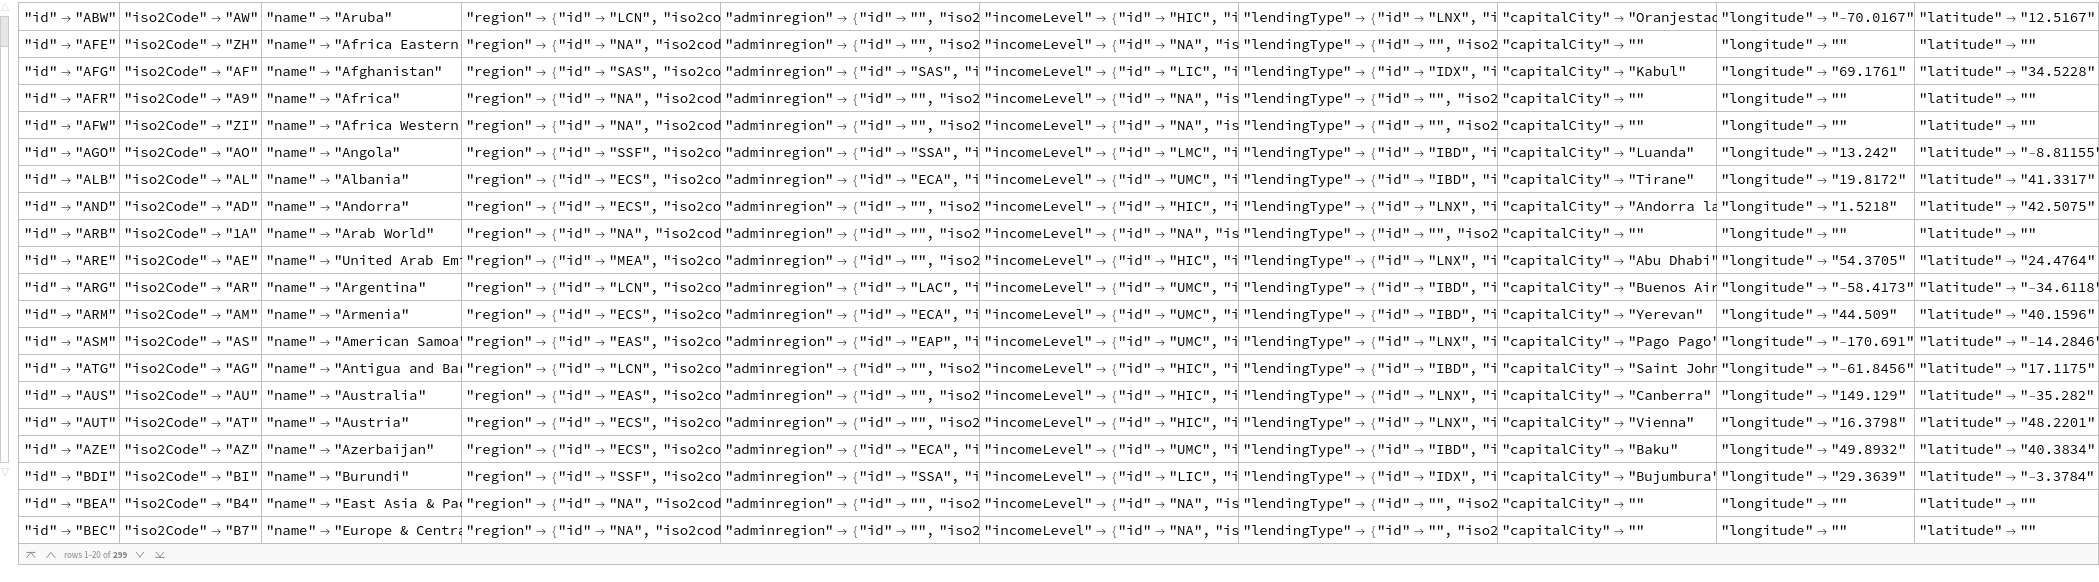

In [ ]:
countryData = rawCountryData[[1, 2]];
countryData // Dataset

In [ ]:
countryIso2Code = "iso2Code" /. countryData;
countryIso2Code // Shallow
(* 
"/." is the shorthand notation for "ReplaceAll", which applies rules to each subpart of a given list (countryData in our case). 
Hovering over the /.symbols in Mathematica should display a popup for more information.
*)

{AW, ZH, AF, A9, ZI, AO, AL, AD, 1A, AE, <<289>>}

Extract country names:

{Aruba, Africa Eastern and Southern, Afghanistan, Africa, Africa Western and Central, 
 
>   Angola, Albania, Andorra, Arab World, United Arab Emirates, <<289>>}
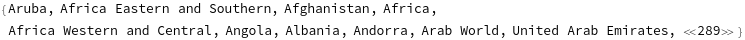

In [ ]:
countryName = "name" /. countryData;
countryName // Shallow

{{AW, Aruba}, {ZH, Africa Eastern and Southern}, {AF, Afghanistan}, {A9, Africa}, 
 
>   {ZI, Africa Western and Central}, {AO, Angola}, {AL, Albania}, {AD, Andorra}, 
 
>   {1A, Arab World}, {AE, United Arab Emirates}, <<289>>}
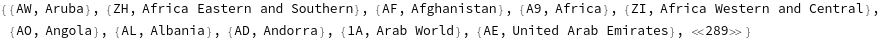

In [ ]:
countryIso2CodeName = Transpose[{countryIso2Code, countryName}];
countryIso2CodeName // Shallow

So now we know the country iso2codes, which we can use to pull specific indicator data for countries.

## 2. Compile a Custom Indicator Dataset

There are many availabe indicators: https://data.worldbank.org/indicator

We wll select three indicators for this example:

1. Scientific and Technical Journal Article Data = [IP.JRN.ARTC.SC](https://data.worldbank.org/indicator/IP.JRN.ARTC.SC?view=chart)

2. Patent Applications, residents = [IP.PAT.RESD](https://data.worldbank.org/indicator/IP.PAT.RESD?view=chart)

3. GDP per capita (current US$) Code = [NY.GDP.PCAP.CD](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart)

Note that these three selected indictaors have a [CC-BY 4.0 license](https://datacatalog.worldbank.org/public-licenses#cc-by). We will compile this indicator data for the United States (US) and United Kingdom (GB)

In [ ]:
indicators = {"IP.JRN.ARTC.SC", "IP.PAT.RESD", "NY.GDP.PCAP.CD"}

{IP.JRN.ARTC.SC, IP.PAT.RESD, NY.GDP.PCAP.CD}

Generate the web API URLs we need for U.S.:

In [ ]:
USApiURL = {};
For[
 i = 1, i <= Length[indicators], i++,
 AppendTo[USApiURL, 
  URLBuild[{urlRoot, "country", "US", "indicator", 
    indicators[[i]]}, {"format" -> "json", "per_page" -> 500}]]
 ]
USApiURL

{https://api.worldbank.org/v2/country/US/indicator/IP.JRN.ARTC.SC?format=json&per_page=5\
 
>    00, https://api.worldbank.org/v2/country/US/indicator/IP.PAT.RESD?format=json&per_p\
 
>    age=500, https://api.worldbank.org/v2/country/US/indicator/NY.GDP.PCAP.CD?format=js\
 
>    on&per_page=500}

Retrieving Data

In [ ]:
USIndicatorData = {};
For[
 j = 1, j <= Length[USApiURL], j++,
 AppendTo[USIndicatorData, URLExecute[USApiURL[[j]]]];
 Pause[1]
 ]

{{2020, Null}, {2019, Null}, {2018, 422808.}, {2017, 432216.}, {2016, 427265.}, 
 
>   {2015, 429989.}, {2014, 433192.}, {2013, 429570.}, {2012, 427997.}, {2011, 423959.}, 
 
>   {2010, 408817.}, {2009, 399350.}, {2008, 393979.}, {2007, 391910.}, {2006, 385515}, 
 
>   {2005, 384573.}, {2004, 353853.}, {2003, 329399.}, {2002, 319308.}, {2001, 305613.}, 
 
>   {2000, 304782.}, {1999, Null}, {1998, Null}, {1997, Null}, {1996, Null}, 
 
>   {1995, Null}, {1994, Null}, {1993, Null}, {1992, Null}, {1991, Null}, {1990, Null}, 
 
>   {1989, Null}, {1988, Null}, {1987, Null}, {1986, Null}, {1985, Null}, {1984, Null}, 
 
>   {1983, Null}, {1982, Null}, {1981, Null}, {1980, Null}, {1979, Null}, {1978, Null}, 
 
>   {1977, Null}, {1976, Null}, {1975, Null}, {1974, Null}, {1973, Null}, {1972, Null}, 
 
>   {1971, Null}, {1970, Null}, {1969, Null}, {1968, Null}, {1967, Null}, {1966, Null}, 
 
>   {1965, Null}, {1964, Null}, {1963, Null}, {1962, Null}, {1961, Null}, {1960, Null}}
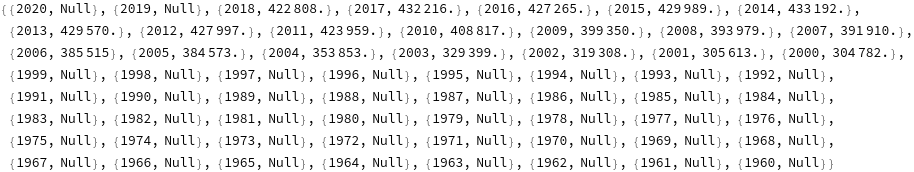

In [ ]:
USJournalData = {"date", "value"} /. USIndicatorData[[1, 2]]

{{2020, Null}, {2019, 285113}, {2018, 285095}, {2017, 293904}, {2016, 295327}, 
 
>   {2015, 288335}, {2014, 285096}, {2013, 287831}, {2012, 268782}, {2011, 247750}, 
 
>   {2010, 241977}, {2009, 224912}, {2008, 231588}, {2007, 241347}, {2006, 221784}, 
 
>   {2005, 207867}, {2004, 189536}, {2003, 188941}, {2002, 184245}, {2001, 177513}, 
 
>   {2000, 164795}, {1999, 149251}, {1998, 134733}, {1997, 119214}, {1996, 106892}, 
 
>   {1995, 123962}, {1994, 107233}, {1993, 99955}, {1992, 92425}, {1991, 87955}, 
 
>   {1990, 90643}, {1989, 82370}, {1988, 75192}, {1987, 68315}, {1986, 65195}, 
 
>   {1985, 63673}, {1984, 61841}, {1983, 59391}, {1982, 63316}, {1981, 62404}, 
 
>   {1980, 62098}, {1979, Null}, {1978, Null}, {1977, Null}, {1976, Null}, {1975, Null}, 
 
>   {1974, Null}, {1973, Null}, {1972, Null}, {1971, Null}, {1970, Null}, {1969, Null}, 
 
>   {1968, Null}, {1967, Null}, {1966, Null}, {1965, Null}, {1964, Null}, {1963, Null}, 
 
>   {1962, Null}, {1961, Null}, {1960, Null}}
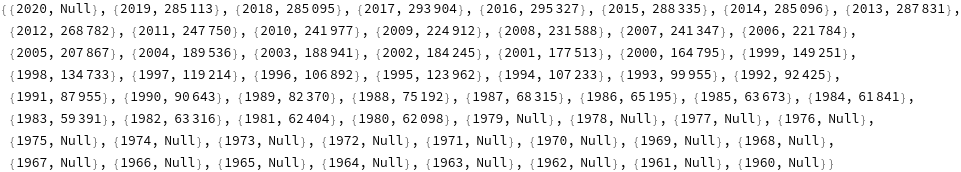

In [ ]:
USPatentData = {"date", "value"} /. USIndicatorData[[2, 2]]

In [ ]:
USGdpData = {"date", "value"} /. USIndicatorData[[3, 2]]

{{2020, 63413.5}, {2019, 65279.5}, {2018, 63064.4}, {2017, 60109.7}, {2016, 58021.4}, 
 
>   {2015, 56863.4}, {2014, 55050.}, {2013, 53106.5}, {2012, 51602.9}, {2011, 49882.6}, 
 
>   {2010, 48466.7}, {2009, 47100.}, {2008, 48382.6}, {2007, 47976.}, {2006, 46298.7}, 
 
>   {2005, 44114.7}, {2004, 41712.8}, {2003, 39496.5}, {2002, 38023.2}, {2001, 37133.2}, 
 
>   {2000, 36334.9}, {1999, 34513.6}, {1998, 32853.7}, {1997, 31459.1}, {1996, 29967.7}, 
 
>   {1995, 28690.9}, {1994, 27694.9}, {1993, 26387.3}, {1992, 25419.}, {1991, 24342.3}, 
 
>   {1990, 23888.6}, {1989, 22857.2}, {1988, 21417.}, {1987, 20038.9}, {1986, 19071.2}, 
 
>   {1985, 18236.8}, {1984, 17121.2}, {1983, 15543.9}, {1982, 14433.8}, {1981, 13976.1}, 
 
>   {1980, 12574.8}, {1979, 11674.2}, {1978, 10564.9}, {1977, 9452.58}, {1976, 8592.25}, 
 
>   {1975, 7801.46}, {1974, 7225.69}, {1973, 6726.36}, {1972, 6094.02}, {1971, 5609.38}, 
 
>   {1970, 5234.3}, {1969, 5032.14}, {1968, 4695.92}, {1967, 4336.43}, {1966, 4146.32}, 
 
>   {1965, 3827.53}, {1964, 3573.94}, {1963, 3374.52}, {1962, 3243.84}, {1961, 3066.56}, 
 
>   {1960, 3007.12}}

Dataset[{{{2020, Null}, {2020, Null}, {2020, 63413.5}}, 
 
>    {{2019, Null}, {2019, 285113}, {2019, 65279.5}}, 
 
>    {{2018, 422808.}, {2018, 285095}, {2018, 63064.4}}, 
 
>    {{2017, 432216.}, {2017, 293904}, {2017, 60109.7}}, 
 
>    {{2016, 427265.}, {2016, 295327}, {2016, 58021.4}}, 
 
>    {{2015, 429989.}, {2015, 288335}, {2015, 56863.4}}, 
 
>    {{2014, 433192.}, {2014, 285096}, {2014, 55050.}}, 
 
>    {{2013, 429570.}, {2013, 287831}, {2013, 53106.5}}, 
 
>    {{2012, 427997.}, {2012, 268782}, {2012, 51602.9}}, 
 
>    {{2011, 423959.}, {2011, 247750}, {2011, 49882.6}}, 
 
>    {{2010, 408817.}, {2010, 241977}, {2010, 48466.7}}, 
 
>    {{2009, 399350.}, {2009, 224912}, {2009, 47100.}}, 
 
>    {{2008, 393979.}, {2008, 231588}, {2008, 48382.6}}, 
 
>    {{2007, 391910.}, {2007, 241347}, {2007, 47976.}}, 
 
>    {{2006, 385515}, {2006, 221784}, {2006, 46298.7}}, 
 
>    {{2005, 384573.}, {2005, 207867}, {2005, 44114.7}}, 
 
>    {{2004, 353853.}, {2004, 189536}, {2004, 41712.8}}, 
 
>    {{2003, 329399.}, {2003, 188941}, {2003, 39496.5}}, 
 
>    {{2002, 319308.}, {2002, 184245}, {2002, 38023.2}}, 
 
>    {{2001, 305613.}, {2001, 177513}, {2001, 37133.2}}, 
 
>    {{2000, 304782.}, {2000, 164795}, {2000, 36334.9}}, 
 
>    {{1999, Null}, {1999, 149251}, {1999, 34513.6}}, 
 
>    {{1998, Null}, {1998, 134733}, {1998, 32853.7}}, 
 
>    {{1997, Null}, {1997, 119214}, {1997, 31459.1}}, 
 
>    {{1996, Null}, {1996, 106892}, {1996, 29967.7}}, 
 
>    {{1995, Null}, {1995, 123962}, {1995, 28690.9}}, 
 
>    {{1994, Null}, {1994, 107233}, {1994, 27694.9}}, 
 
>    {{1993, Null}, {1993, 99955}, {1993, 26387.3}}, 
 
>    {{1992, Null}, {1992, 92425}, {1992, 25419.}}, 
 
>    {{1991, Null}, {1991, 87955}, {1991, 24342.3}}, 
 
>    {{1990, Null}, {1990, 90643}, {1990, 23888.6}}, 
 
>    {{1989, Null}, {1989, 82370}, {1989, 22857.2}}, 
 
>    {{1988, Null}, {1988, 75192}, {1988, 21417.}}, 
 
>    {{1987, Null}, {1987, 68315}, {1987, 20038.9}}, 
 
>    {{1986, Null}, {1986, 65195}, {1986, 19071.2}}, 
 
>    {{1985, Null}, {1985, 63673}, {1985, 18236.8}}, 
 
>    {{1984, Null}, {1984, 61841}, {1984, 17121.2}}, 
 
>    {{1983, Null}, {1983, 59391}, {1983, 15543.9}}, 
 
>    {{1982, Null}, {1982, 63316}, {1982, 14433.8}}, 
 
>    {{1981, Null}, {1981, 62404}, {1981, 13976.1}}, 
 
>    {{1980, Null}, {1980, 62098}, {1980, 12574.8}}, 
 
>    {{1979, Null}, {1979, Null}, {1979, 11674.2}}, 
 
>    {{1978, Null}, {1978, Null}, {1978, 10564.9}}, 
 
>    {{1977, Null}, {1977, Null}, {1977, 9452.58}}, 
 
>    {{1976, Null}, {1976, Null}, {1976, 8592.25}}, 
 
>    {{1975, Null}, {1975, Null}, {1975, 7801.46}}, 
 
>    {{1974, Null}, {1974, Null}, {1974, 7225.69}}, 
 
>    {{1973, Null}, {1973, Null}, {1973, 6726.36}}, 
 
>    {{1972, Null}, {1972, Null}, {1972, 6094.02}}, 
 
>    {{1971, Null}, {1971, Null}, {1971, 5609.38}}, 
 
>    {{1970, Null}, {1970, Null}, {1970, 5234.3}}, 
 
>    {{1969, Null}, {1969, Null}, {1969, 5032.14}}, 
 
>    {{1968, Null}, {1968, Null}, {1968, 4695.92}}, 
 
>    {{1967, Null}, {1967, Null}, {1967, 4336.43}}, 
 
>    {{1966, Null}, {1966, Null}, {1966, 4146.32}}, 
 
>    {{1965, Null}, {1965, Null}, {1965, 3827.53}}, 
 
>    {{1964, Null}, {1964, Null}, {1964, 3573.94}}, 
 
>    {{1963, Null}, {1963, Null}, {1963, 3374.52}}, 
 
>    {{1962, Null}, {1962, Null}, {1962, 3243.84}}, 
 
>    {{1961, Null}, {1961, Null}, {1961, 3066.56}}, 
 
>    {{1960, Null}, {1960, Null}, {1960, 3007.12}}}, 
 
>   TypeSystem`Vector[TypeSystem`Tuple[{TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`AnyType}], TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`AnyType}], TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`Atom[Real]}]}], 61], <||>]
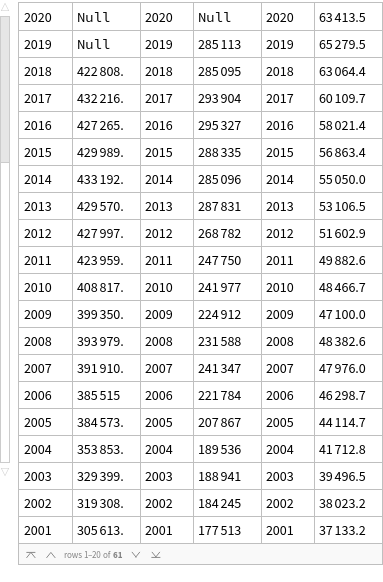

In [ ]:
USData = Transpose[{USJournalData, USPatentData, USGdpData}];
USData // Dataset

For the United Kingdom:

In [ ]:
UKApiURL = {};
For[
 i = 1, i <= Length[indicators], i++,
 AppendTo[UKApiURL, 
  URLBuild[{urlRoot, "country", "GB", "indicator", 
    indicators[[i]]}, {"format" -> "json", "per_page" -> 500}]]
 ]
UKApiURL

{https://api.worldbank.org/v2/country/GB/indicator/IP.JRN.ARTC.SC?format=json&per_page=5\
 
>    00, https://api.worldbank.org/v2/country/GB/indicator/IP.PAT.RESD?format=json&per_p\
 
>    age=500, https://api.worldbank.org/v2/country/GB/indicator/NY.GDP.PCAP.CD?format=js\
 
>    on&per_page=500}

In [ ]:
UKIndicatorData = {};
For[
 j = 1, j <= Length[UKApiURL], j++,
 AppendTo[UKIndicatorData, URLExecute[UKApiURL[[j]]]];
 Pause[1]
 ]

Dataset[{{{page -> 1, pages -> 1, per_page -> 500, total -> 61, sourceid -> 2, 
 
>      sourcename -> World Development Indicators, lastupdated -> 2021-12-16}, 
 
>     {{indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2020, value -> Null, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2019, value -> Null, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2018, value -> 97680.9, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2017, value -> 99128.7, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2016, value -> 99366.2, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2015, value -> 99616., unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2014, value -> 99384.8, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2013, value -> 99228.4, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2012, value -> 98144.9, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2011, value -> 95820.1, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2010, value -> 93791.5, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2009, value -> 93803.4, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2008, value -> 91357.7, unit -> , obs_status -> , decimal -> 0}, 
 
>      {indicator -> 
 
>        {id -> IP.JRN.ARTC.SC, value -> Scientific and technical journal articles}, 
 
>       country -> {id -> GB, value -> United Kingdom}, countryiso3code -> GBR, 
 
>       date -> 2007,
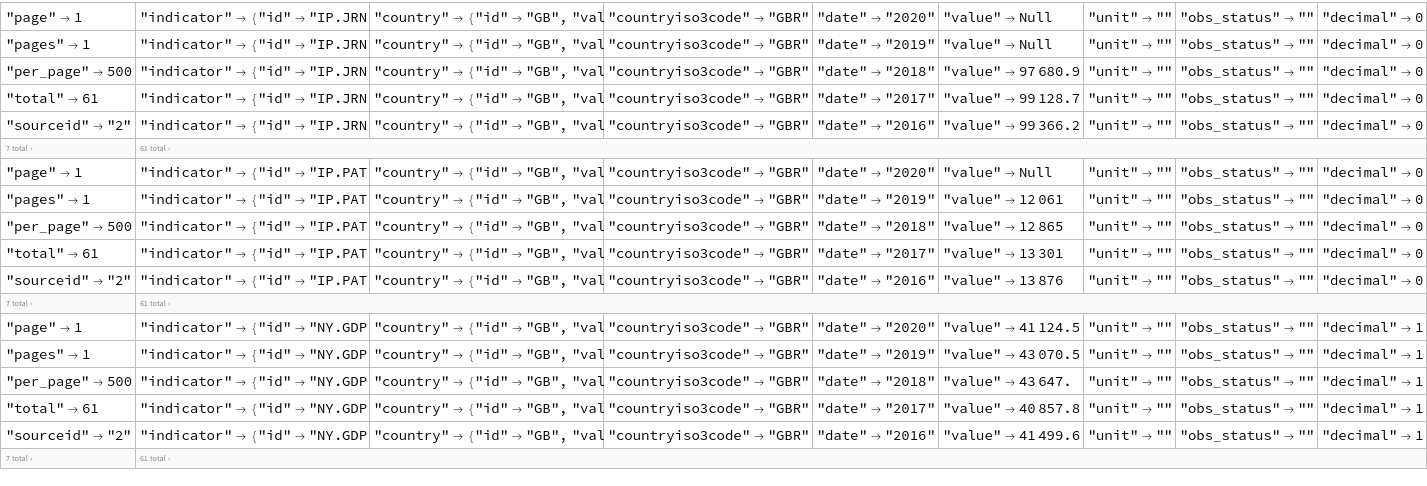

In [ ]:
UKIndicatorData // Dataset

Dataset[{{{2020, Null}, {2020, Null}, {2020, 41124.5}}, 
 
>    {{2019, Null}, {2019, 12061}, {2019, 43070.5}}, 
 
>    {{2018, 97680.9}, {2018, 12865}, {2018, 43647.}}, 
 
>    {{2017, 99128.7}, {2017, 13301}, {2017, 40857.8}}, 
 
>    {{2016, 99366.2}, {2016, 13876}, {2016, 41499.6}}, 
 
>    {{2015, 99616.}, {2015, 14867}, {2015, 45404.6}}, 
 
>    {{2014, 99384.8}, {2014, 15196}, {2014, 47787.2}}, 
 
>    {{2013, 99228.4}, {2013, 14972}, {2013, 43713.8}}, 
 
>    {{2012, 98144.9}, {2012, 15370}, {2012, 42686.8}}, 
 
>    {{2011, 95820.1}, {2011, 15343}, {2011, 42284.9}}, 
 
>    {{2010, 93791.5}, {2010, 15490}, {2010, 39688.6}}, 
 
>    {{2009, 93803.4}, {2009, 15985}, {2009, 38952.2}}, 
 
>    {{2008, 91357.7}, {2008, 16523}, {2008, 47549.3}}, 
 
>    {{2007, 91212.8}, {2007, 17375}, {2007, 50653.3}}, 
 
>    {{2006, 88142.5}, {2006, 17484}, {2006, 44654.1}}, 
 
>    {{2005, 84940.1}, {2005, 17833}, {2005, 42132.1}}, 
 
>    {{2004, 79250.}, {2004, 19178}, {2004, 40371.7}}, 
 
>    {{2003, 75564.1}, {2003, 20426}, {2003, 34487.5}}, 
 
>    {{2002, 74814.5}, {2002, 20624}, {2002, 30049.9}}, 
 
>    {{2001, 73779.9}, {2001, 21423}, {2001, 27806.4}}, 
 
>    {{2000, 77244.9}, {2000, 22050}, {2000, 28223.1}}, 
 
>    {{1999, Null}, {1999, 21333}, {1999, 28726.9}}, 
 
>    {{1998, Null}, {1998, 19530}, {1998, 28269.3}}, 
 
>    {{1997, Null}, {1997, 17938}, {1997, 26743.}}, 
 
>    {{1996, Null}, {1996, 18184}, {1996, 24438.5}}, 
 
>    {{1995, Null}, {1995, 18630}, {1995, 23206.6}}, 
 
>    {{1994, Null}, {1994, 18384}, {1994, 19709.2}}, 
 
>    {{1993, Null}, {1993, 18727}, {1993, 18389.}}, 
 
>    {{1992, Null}, {1992, 18848}, {1992, 20487.2}}, 
 
>    {{1991, Null}, {1991, 19230}, {1991, 19900.7}}, 
 
>    {{1990, Null}, {1990, 19310}, {1990, 19095.5}}, 
 
>    {{1989, Null}, {1989, 19732}, {1989, 16239.3}}, 
 
>    {{1988, Null}, {1988, 20536}, {1988, 15987.2}}, 
 
>    {{1987, Null}, {1987, 19945}, {1987, 13118.6}}, 
 
>    {{1986, Null}, {1986, 20040}, {1986, 10611.1}}, 
 
>    {{1985, Null}, {1985, 19672}, {1985, 8652.22}}, 
 
>    {{1984, Null}, {1984, 19093}, {1984, 8179.19}}, 
 
>    {{1983, Null}, {1983, 19893}, {1983, 8691.52}}, 
 
>    {{1982, Null}, {1982, 20530}, {1982, 9146.08}}, 
 
>    {{1981, Null}, {1981, 20808}, {1981, 9599.31}}, 
 
>    {{1980, Null}, {1980, 19612}, {1980, 10032.1}}, 
 
>    {{1979, Null}, {1979, Null}, {1979, 7804.76}}, 
 
>    {{1978, Null}, {1978, Null}, {1978, 5976.94}}, 
 
>    {{1977, Null}, {1977, Null}, {1977, 4681.44}}, 
 
>    {{1976, Null}, {1976, Null}, {1976, 4138.17}}, 
 
>    {{1975, Null}, {1975, Null}, {1975, 4299.75}}, 
 
>    {{1974, Null}, {1974, Null}, {1974, 3665.86}}, 
 
>    {{1973, Null}, {1973, Null}, {1973, 3426.28}}, 
 
>    {{1972, Null}, {1972, Null}, {1972, 3030.43}}, 
 
>    {{1971, Null}, {1971, Null}, {1971, 2649.8}}, 
 
>    {{1970, Null}, {1970, Null}, {1970, 2347.54}}, 
 
>    {{1969, Null}, {1969, Null}, {1969, 2100.67}}, 
 
>    {{1968, Null}, {1968, Null}, {1968, 1951.76}}, 
 
>    {{1967, Null}, {1967, Null}, {1967, 2058.78}}, 
 
>    {{1966, Null}, {1966, Null}, {1966, 1986.75}}, 
 
>    {{1965, Null}, {1965, Null}, {1965, 1873.57}}, 
 
>    {{1964, Null}, {1964, Null}, {1964, 1748.29}}, 
 
>    {{1963, Null}, {1963, Null}, {1963, 1613.46}}, 
 
>    {{1962, Null}, {1962, Null}, {1962, 1525.78}}, 
 
>    {{1961, Null}, {1961, Null}, {1961, 1472.39}}, 
 
>    {{1960, Null}, {1960, Null}, {1960, 1397.59}}}, 
 
>   TypeSystem`Vector[TypeSystem`Tuple[{TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`AnyType}], TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`AnyType}], TypeSystem`Tuple[{TypeSystem`Atom[String], 
 
>        TypeSystem`Atom[Real]}]}], 61], <||>]
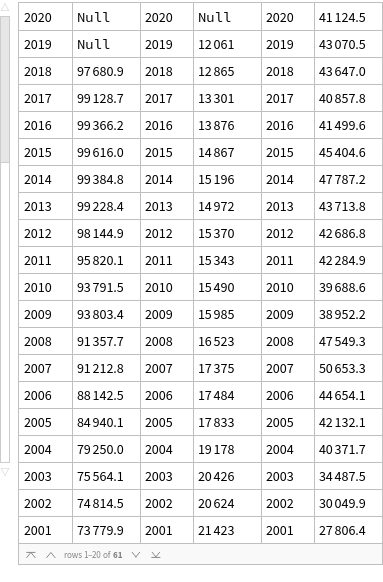

In [ ]:
UKJournalData = {"date", "value"} /. UKIndicatorData[[1, 2]];
UKPatentData = {"date", "value"} /. UKIndicatorData[[2, 2]];
UKGdpData = {"date", "value"} /. UKIndicatorData[[3, 2]];
UKData = Transpose[{UKJournalData, UKPatentData, UKGdpData}];
UKData // Dataset

{{2020, Null}, {2019, Null}, {2018, 422808.}, {2017, 432216.}, {2016, 427265.}, 
 
>   {2015, 429989.}, {2014, 433192.}, {2013, 429570.}, {2012, 427997.}, {2011, 423959.}, 
 
>   {2010, 408817.}, {2009, 399350.}, {2008, 393979.}, {2007, 391910.}, {2006, 385515}, 
 
>   {2005, 384573.}, {2004, 353853.}, {2003, 329399.}, {2002, 319308.}, {2001, 305613.}, 
 
>   {2000, 304782.}, {1999, Null}, {1998, Null}, {1997, Null}, {1996, Null}, 
 
>   {1995, Null}, {1994, Null}, {1993, Null}, {1992, Null}, {1991, Null}, {1990, Null}, 
 
>   {1989, Null}, {1988, Null}, {1987, Null}, {1986, Null}, {1985, Null}, {1984, Null}, 
 
>   {1983, Null}, {1982, Null}, {1981, Null}, {1980, Null}, {1979, Null}, {1978, Null}, 
 
>   {1977, Null}, {1976, Null}, {1975, Null}, {1974, Null}, {1973, Null}, {1972, Null}, 
 
>   {1971, Null}, {1970, Null}, {1969, Null}, {1968, Null}, {1967, Null}, {1966, Null}, 
 
>   {1965, Null}, {1964, Null}, {1963, Null}, {1962, Null}, {1961, Null}, {1960, Null}}
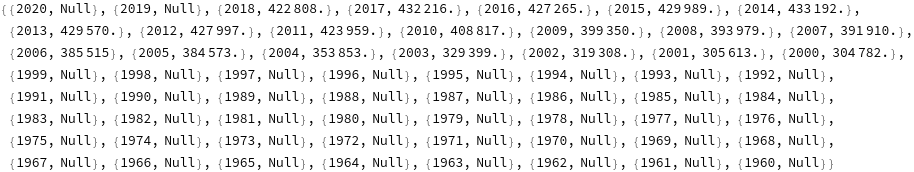

In [ ]:
USJournalData

## 3. Plot Indicator data

Create line plots of US/UK Number of Scientific and Technical Journal Articles and Patents by year. As there are no values before the year 2000, we will slice our data for visualizations accordingly.

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]]}, {US IP, UK IP}, 
 
>     LegendMarkers -> {{-Graphics-, Offset[6.272]}, {-Graphics-, Offset[6.72]}}, 
 
>     Joined -> {True, True}, LabelStyle -> {}, LegendLayout -> Column], After, Identity]
 
>    ]
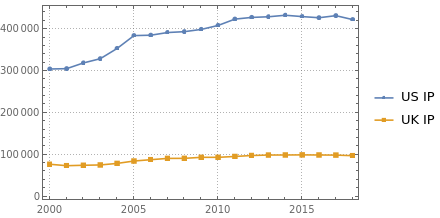

In [ ]:
DateListPlot[{USJournalData[[;; 21]], UKJournalData[[;; 21]]}, 
 PlotMarkers -> Automatic, PlotLegends -> {"US IP", "UK IP"}, PlotTheme -> "Detailed"]

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.0128333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.0128333], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]]}, {US GDP, UK GDP}, 
 
>     LegendMarkers -> {{-Graphics-, Offset[6.272]}, {-Graphics-, Offset[6.72]}}, 
 
>     Joined -> {True, True}, LabelStyle -> {}, LegendLayout -> Column], After, Identity]
 
>    ]
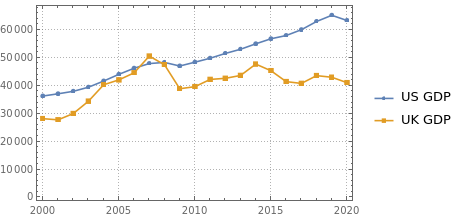

In [ ]:
DateListPlot[{USGdpData[[;; 21]], UKGdpData[[;; 21]]}, 
 PlotMarkers -> Automatic, PlotLegends -> {"US GDP", "UK GDP"}, PlotTheme -> "Detailed"]

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.011], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.011], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]]}, {US Patents, UK Patents}, 
 
>     LegendMarkers -> {{-Graphics-, Offset[6.272]}, {-Graphics-, Offset[6.72]}}, 
 
>     Joined -> {True, True}, LabelStyle -> {}, LegendLayout -> Column], After, Identity]
 
>    ]
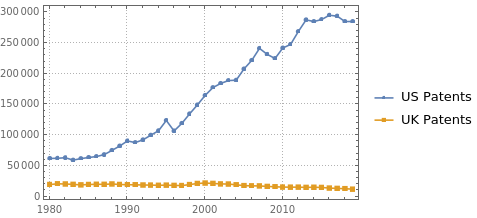

In [ ]:
DateListPlot[{USPatentData[[;; 41]], UKPatentData[[;; 41]]}, 
 PlotMarkers -> Automatic, PlotLegends -> {"US Patents", "UK Patents"}, PlotTheme -> "Detailed"]